In [ ]:
Boxplot Based on original data

#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pytz
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates


**Required Functions**

In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
#The funcion will check the geo location and convert the time to corrresponding time in the geographic location
def getLocalDateTime(df) :    
    time_zone = df['time_zone']
    utc_timestamp=df['utc_timestamp']    
    if (time_zone == 'Europe/Dublin') :
        return utc_timestamp.tz_convert('Europe/Dublin')
    elif (time_zone == 'Asia/Riyadh') :
        return utc_timestamp.tz_convert('Asia/Riyadh')
    elif (time_zone == 'Asia/Dubai') :
        return utc_timestamp.tz_convert('Asia/Dubai')    
    elif (time_zone == 'Asia/Kolkata') :
        return utc_timestamp.tz_convert('Asia/Kolkata')

In [ ]:
#function to get different time slot
def getTimeSlot(event_time):
  if event_time in range(8,12):
    return 'Morning'
  elif event_time in range(12,15):
    return 'Noon'
  elif event_time in range(15,18):
    return 'After Noon'
  elif event_time in range(18,21):
    return 'Dinner'
  elif event_time in range(21,24):
    return 'Evening'
  elif event_time in range(0,8):
    return 'Night'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 Dailywise_DwellTime_FlightTime.jpeg
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Month_DwellTime_FlightTime.jpeg
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME
 Timeslot_DwellTime_FlightTime.jpeg
 WeekDays_DwellTime_FlightTime.jpeg


**Read Pickle**

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_new_multiple_user_26_07_2021.p')
df_event

Start Pickle Load time: 2021-08-09 11:59:59.891409
End Pickle Load time: 2021-08-09 12:00:05.947253   Duration:0:00:06.055844


,index,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308195,311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7
308196,311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7
308197,311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7
308198,311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7


**Visualisation**

In [ ]:
#remove less active user #activedays=1
df_event=df_event[~df_event.user_name.isin(['user4','user6','user10'])]


Mulitple Users -Different Time Slot

In [ ]:
#group by user name and time slot
df_event_timeslot=df_event[['event_date','user_name','time_slot','dwell_time_ms','flight_time_ms']]
df_event_timeslot

,event_date,user_name,time_slot,dwell_time_ms,flight_time_ms
0,02-02-2021,user2,Morning,58.0,783.0
1,02-02-2021,user2,Morning,25.0,932.0
2,02-02-2021,user2,Morning,27.0,339.0
3,02-02-2021,user2,Morning,80.0,298.0
4,02-02-2021,user2,Morning,77.0,561.0
...,...,...,...,...,...
308195,26-07-2021,user15,Evening,81.0,273.0
308196,26-07-2021,user15,Evening,122.0,71.0
308197,26-07-2021,user15,Evening,114.0,311.0
308198,26-07-2021,user15,Evening,104.0,267.0


In [ ]:
#filter by timeslot= morning
df_event_morning= df_event_timeslot.query('time_slot=="Morning" ').loc[:,:]  #loc will allocate memory for query result
df_event_morning
#filter by timeslot= noon
df_event_noon= df_event_timeslot.query('time_slot=="Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_noon
#filter by timeslot= afetrnoon
df_event_afternoon= df_event_timeslot.query('time_slot=="After Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_afternoon
#filter by timeslot= evening
df_event_eve= df_event_timeslot.query('time_slot=="Evening" ').loc[:,:]  #loc will allocate memory for query result
df_event_eve
#filter by timeslot= dinner
df_event_dinner= df_event_timeslot.query('time_slot=="Dinner" ').loc[:,:]  #loc will allocate memory for query result
df_event_dinner
#filter by timeslot= night
df_event_night= df_event_timeslot.query('time_slot=="Night" ').loc[:,:]  #loc will allocate memory for query result
df_event_night

,event_date,user_name,time_slot,dwell_time_ms,flight_time_ms
3027,05-02-2021,user2,Night,9.0,275.0
3028,05-02-2021,user2,Night,89.0,626.0
3029,05-02-2021,user2,Night,14.0,519.0
3030,05-02-2021,user2,Night,72.0,511.0
3031,05-02-2021,user2,Night,65.0,169.0
...,...,...,...,...,...
307852,26-07-2021,user15,Night,125.0,461.0
307853,26-07-2021,user15,Night,125.0,202.0
307854,26-07-2021,user15,Night,127.0,149.0
307855,26-07-2021,user15,Night,105.0,345.0


Mulitple Users By Timezone -Different Time Slot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

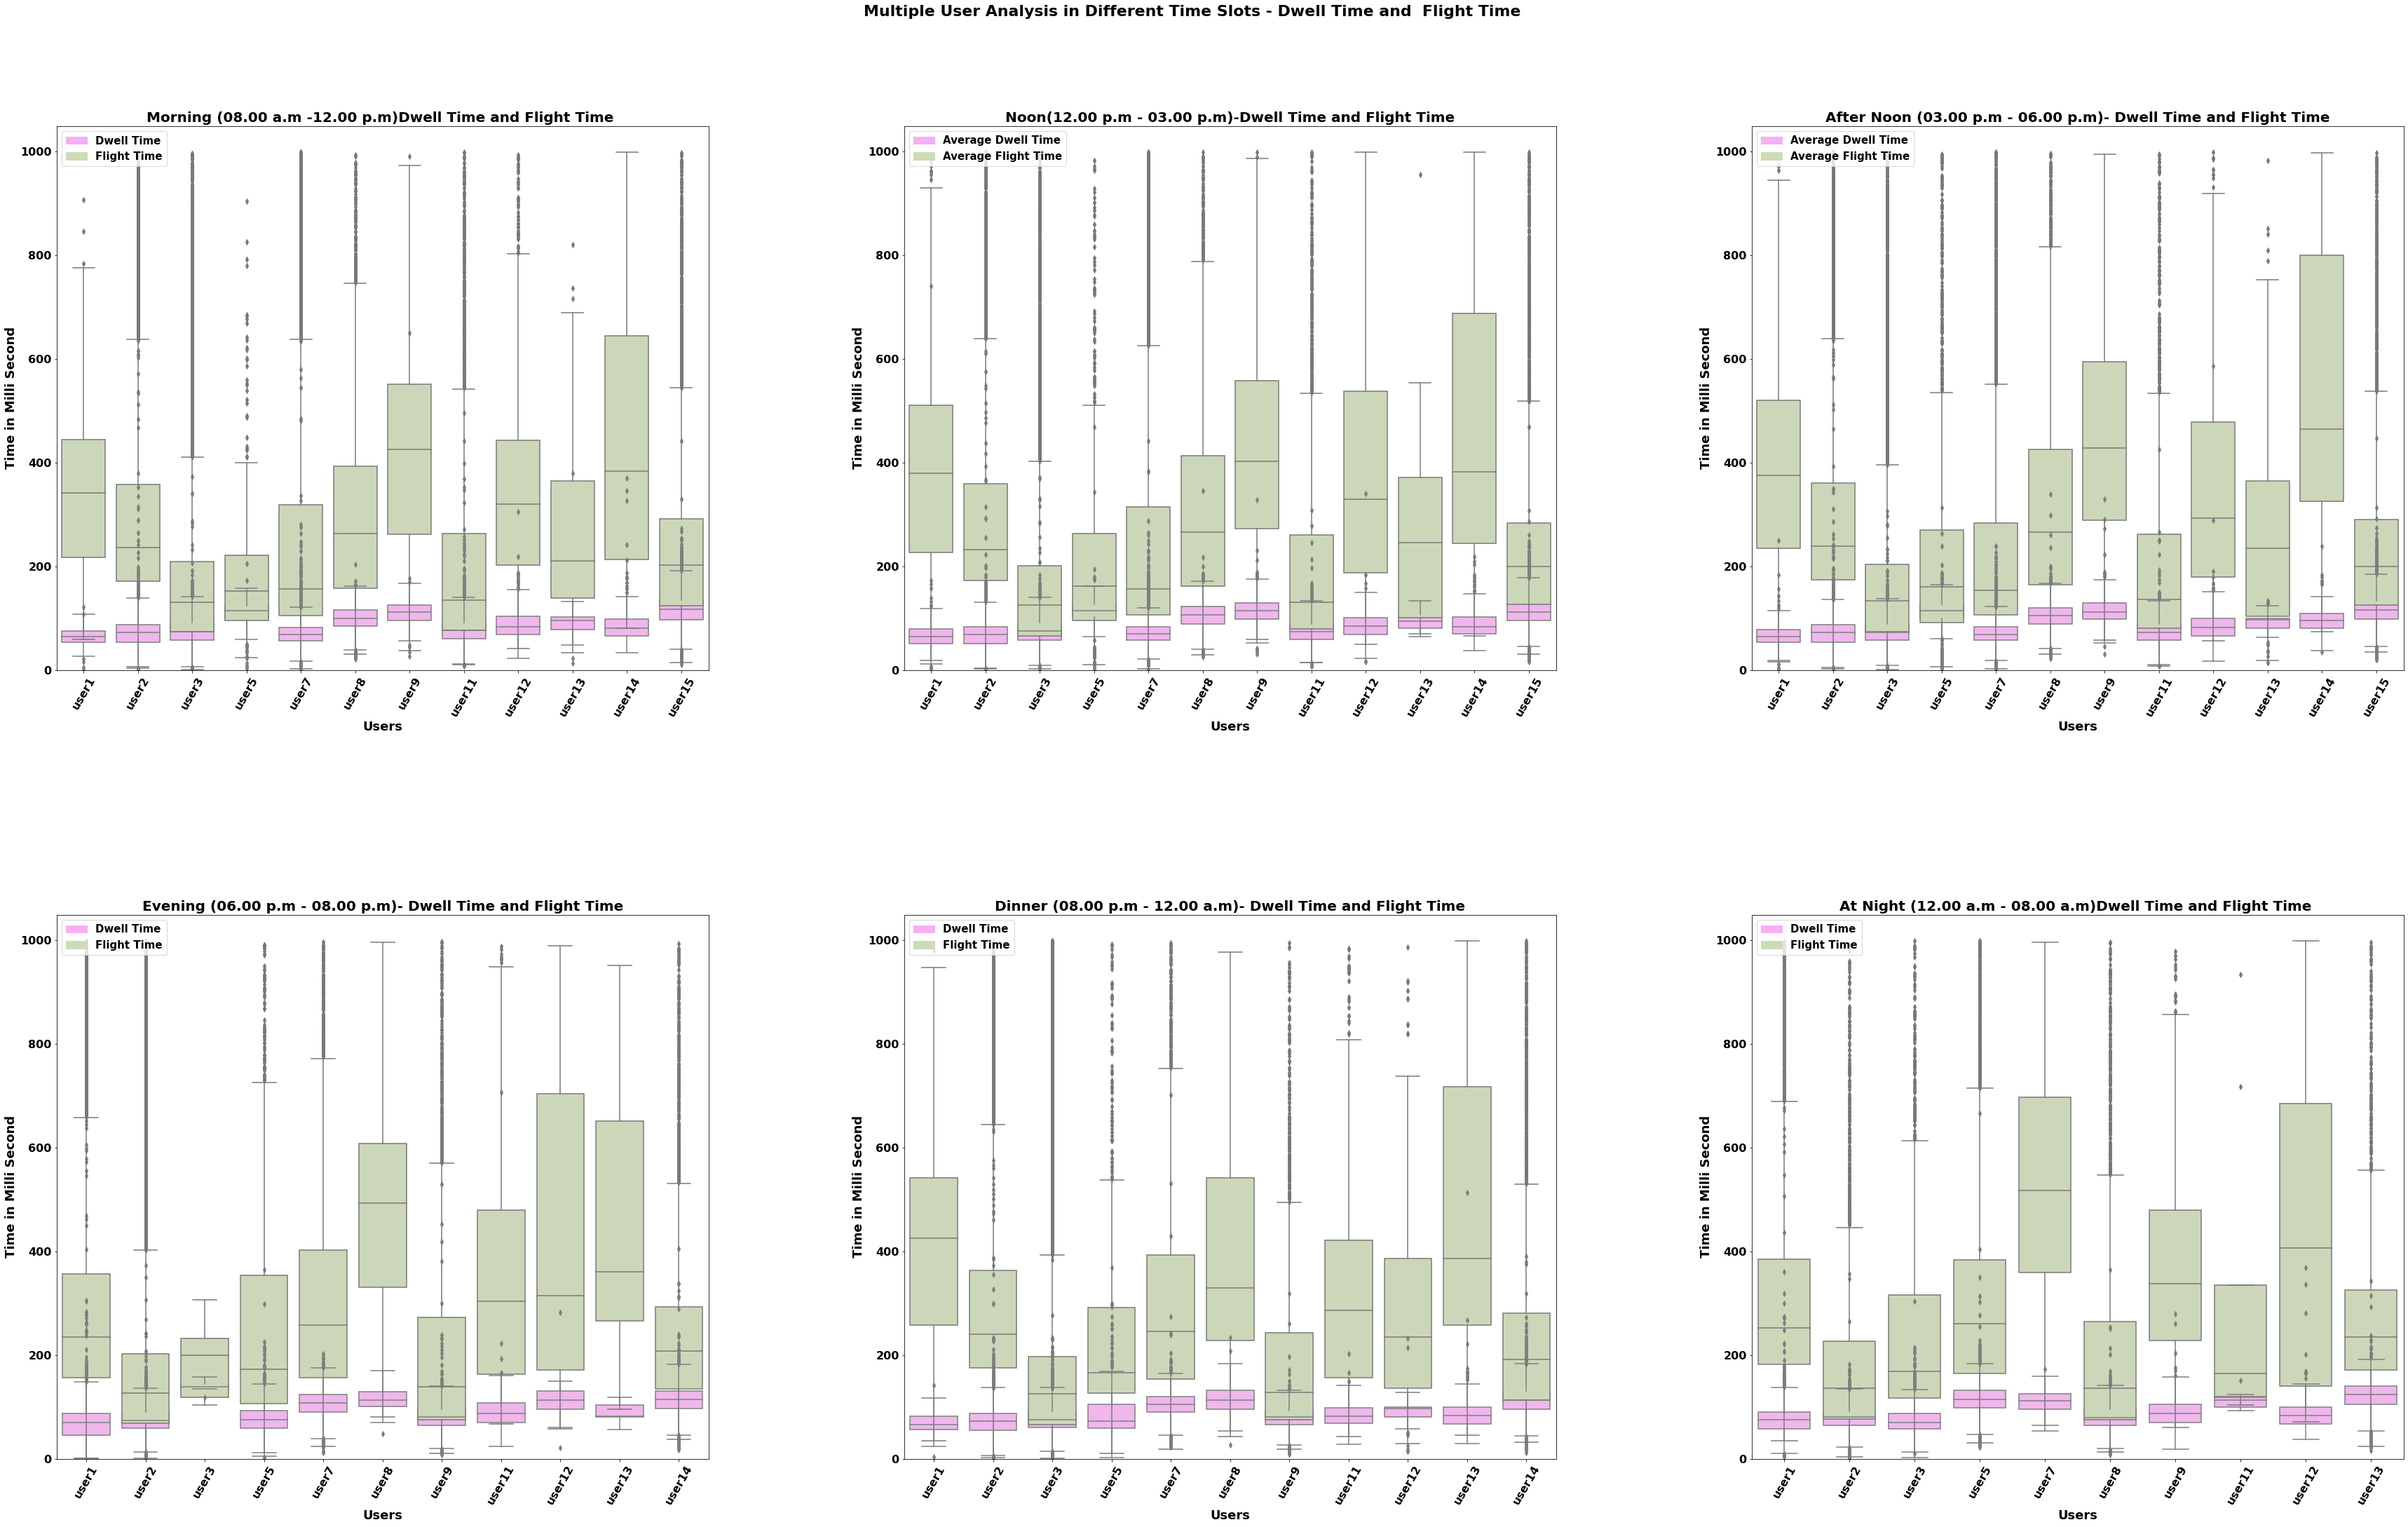

In [ ]:
#Multiple User Analysis in Different Timeslots- Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,30))
#set a figure title on top 
fig.suptitle('Multiple User Analysis in Different Time Slots - Dwell Time and  Flight Time', fontsize = 22,fontweight='bold');
#to plot x axis in user name asc order
df_event_morning['user_name'] = df_event_morning['user_name'].astype('str') 
df_event_morning['user_name']=df_event_morning['user_name'].str.extract('([0-9]+)').astype(int)
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.02, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.45)
#############At Morning #########################################################
plt.subplot(2, 3, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('Morning (08.00 a.m -12.00 p.m)Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax1 = sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_morning)
ax1 = sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_morning)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax1.set_xlabel('Users',size=18,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

######################################################################################################################################################
#################################At Noon ####################################################
#to plot x axis in user name asc order
df_event_noon['user_name'] = df_event_noon['user_name'].astype('str') 
df_event_noon['user_name']=df_event_noon['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 2)#plt.subplot(#rows,#columns,Plot no)
plt.title('Noon(12.00 p.m - 03.00 p.m)-Dwell Time and Flight Time',size = 20,fontweight='bold');
ax2= sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_noon)
ax2= sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_noon)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Average Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Average Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax2.set_xlabel('Users',size=18,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#######################################################################################################################################

################################################At After Noon####################################################################
#to plot x axis in user name asc order
df_event_afternoon['user_name'] = df_event_afternoon['user_name'].astype('str') 
df_event_afternoon['user_name']=df_event_afternoon['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('After Noon (03.00 p.m - 06.00 p.m)- Dwell Time and Flight Time', size = 20,fontweight='bold');
ax3= sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_afternoon)
ax3= sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_afternoon)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Average Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Average Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax3.set_xlabel('Users',size=18,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax3.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')


##################################################################################################################################################
#######################################At Evening#################################################################################################
#to plot x axis in user name asc order
df_event_eve['user_name'] = df_event_eve['user_name'].astype('str') 
df_event_eve['user_name']=df_event_eve['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3,4)#plt.subplot(#rows,#columns,Plot no)
plt.title('Evening (06.00 p.m - 08.00 p.m)- Dwell Time and Flight Time', size = 20,fontweight='bold');
ax4= sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_eve)
ax4= sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_eve)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax4.set_xlabel('Users',size=18,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax4.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

######################################################################################################################################
###########################################At Dinner###############################################################################
#to plot x axis in user name asc order
df_event_dinner['user_name'] = df_event_dinner['user_name'].astype('str') 
df_event_dinner['user_name']=df_event_dinner['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 5)#plt.subplot(#rows,#columns,Plot no)
plt.title('Dinner (08.00 p.m - 12.00 a.m)- Dwell Time and Flight Time',size = 20,fontweight='bold');
ax5= sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_dinner)
ax5= sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_dinner)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 60) 
ax5.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax5.set_xlabel('Users',size=18,fontweight='bold')
ax5.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax5.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

###########################################################################################################################################################
###################################################At Night###################################################################################################
#to plot x axis in user name asc order
df_event_night['user_name'] = df_event_night['user_name'].astype('str') 
df_event_night['user_name']=df_event_night['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 6)#plt.subplot(#rows,#columns,Plot no)
plt.title('At Night (12.00 a.m - 08.00 a.m)Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax6= sns.boxplot(x="user_name", y="dwell_time_ms",color='#f8aef4', data=df_event_night)
ax6= sns.boxplot(x="user_name", y="flight_time_ms",color='#cddcb4', data=df_event_night)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 60) 
ax6.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax6.set_xlabel('Users',size=18,fontweight='bold')
ax6.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax6.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')


Mulitple Users By Timezone -Different Time Slot

In [ ]:
#group by timezone
df_event_tz_timeslot=df_event[['event_date','country_code','time_slot','dwell_time_ms','flight_time_ms']]
df_event_tz_timeslot

,event_date,country_code,time_slot,dwell_time_ms,flight_time_ms
0,02-02-2021,IE,Morning,58.0,783.0
1,02-02-2021,IE,Morning,25.0,932.0
2,02-02-2021,IE,Morning,27.0,339.0
3,02-02-2021,IE,Morning,80.0,298.0
4,02-02-2021,IE,Morning,77.0,561.0
...,...,...,...,...,...
308195,26-07-2021,IN,Evening,81.0,273.0
308196,26-07-2021,IN,Evening,122.0,71.0
308197,26-07-2021,IN,Evening,114.0,311.0
308198,26-07-2021,IN,Evening,104.0,267.0


In [ ]:
#filter by timeslot= morning
df_event_tz_morning= df_event_tz_timeslot.query('time_slot=="Morning" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_morning
#filter by timeslot= noon
df_event_tz_noon= df_event_tz_timeslot.query('time_slot=="Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_noon
#filter by timeslot= afetrnoon
df_event_tz_afternoon= df_event_tz_timeslot.query('time_slot=="After Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_afternoon
#filter by timeslot= evening
df_event_tz_eve= df_event_tz_timeslot.query('time_slot=="Evening" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_eve
#filter by timeslot= dinner
df_event_tz_dinner= df_event_tz_timeslot.query('time_slot=="Dinner" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_dinner
#filter by timeslot= night
df_event_tz_night= df_event_tz_timeslot.query('time_slot=="Night" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_night

,event_date,country_code,time_slot,dwell_time_ms,flight_time_ms
3027,05-02-2021,IE,Night,9.0,275.0
3028,05-02-2021,IE,Night,89.0,626.0
3029,05-02-2021,IE,Night,14.0,519.0
3030,05-02-2021,IE,Night,72.0,511.0
3031,05-02-2021,IE,Night,65.0,169.0
...,...,...,...,...,...
307852,26-07-2021,IN,Night,125.0,461.0
307853,26-07-2021,IN,Night,125.0,202.0
307854,26-07-2021,IN,Night,127.0,149.0
307855,26-07-2021,IN,Night,105.0,345.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

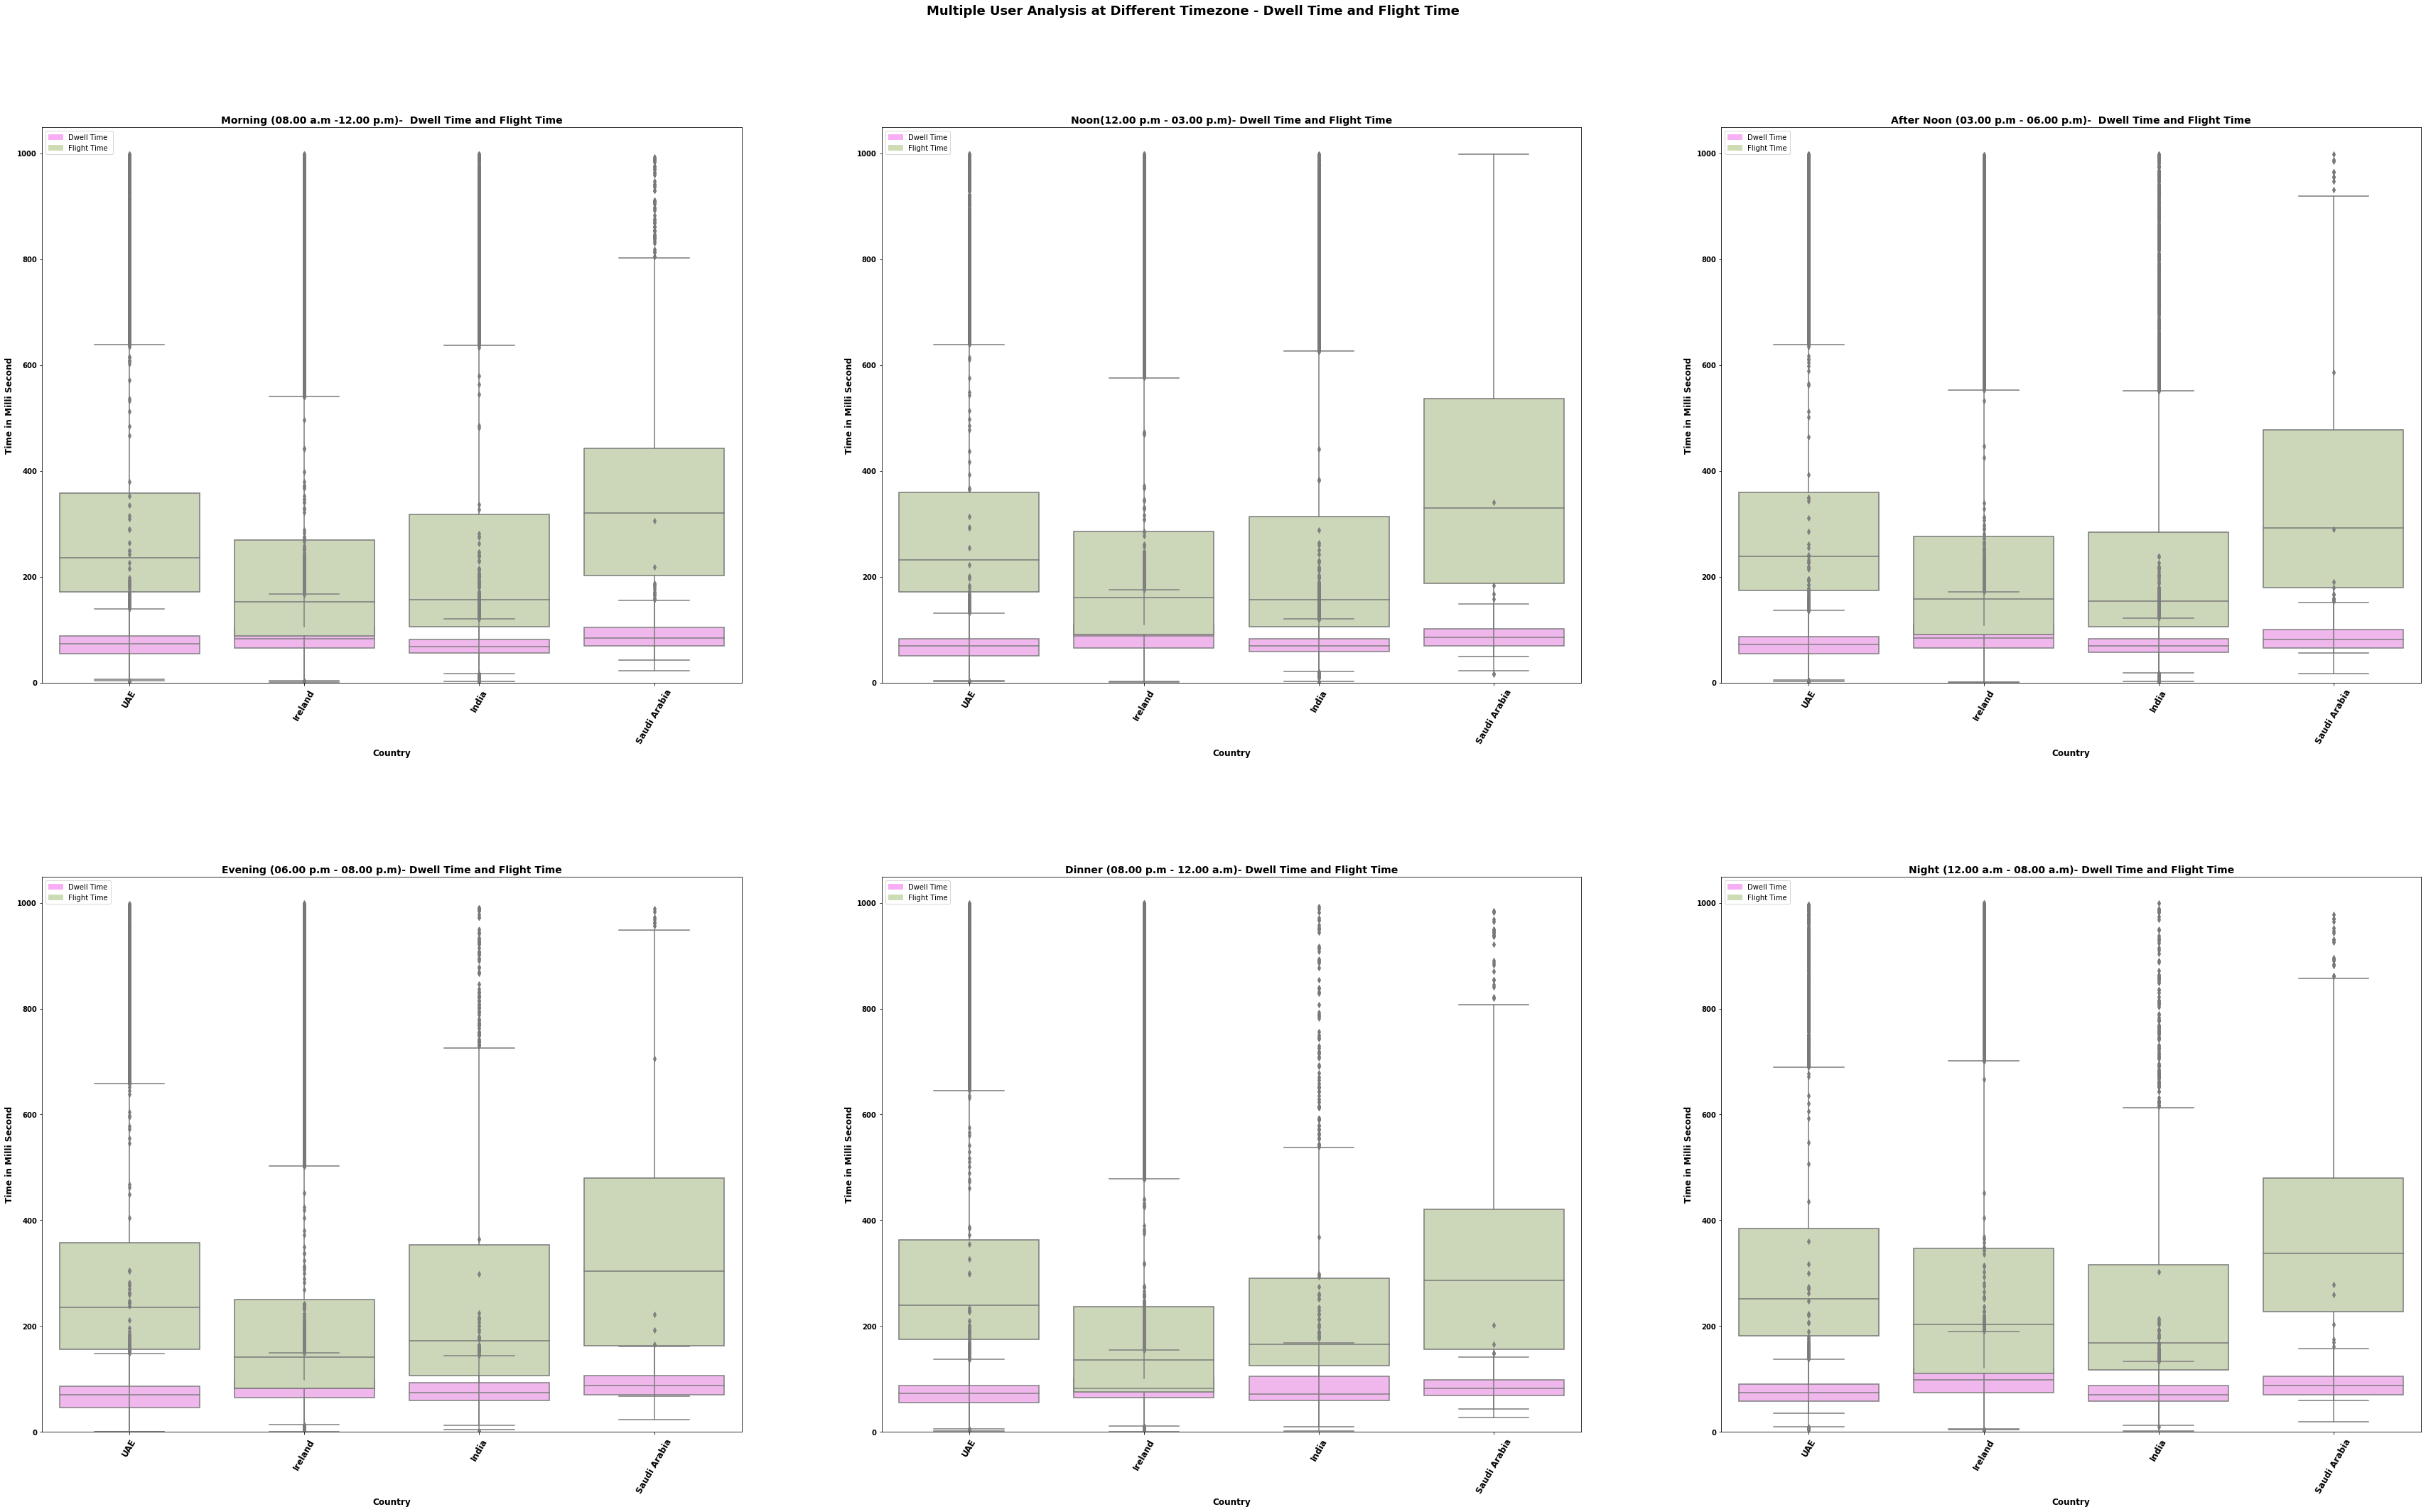

In [ ]:
#Multiple User Analysis at Different  Timezone - Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,30))
#set a figure title on top 
fig.suptitle('Multiple User Analysis at Different Timezone - Dwell Time and Flight Time', fontsize = 18,fontweight='bold');
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
#############At Morning #########################################################
plt.subplot(2, 3, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('Morning (08.00 a.m -12.00 p.m)-  Dwell Time and Flight Time', size = 14,fontweight='bold');
ax1 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_morning)
ax1 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_morning)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax1.set_xlabel('Country',size=12,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')


######################################################################################################################################################
#################################At Noon ####################################################

plt.subplot(2, 3, 2)#plt.subplot(#rows,#columns,Plot no)
plt.title('Noon(12.00 p.m - 03.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax2 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_noon)
ax2 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_noon)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax2.set_xlabel('Country',size=12,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

#######################################################################################################################################
################################################At After Noon####################################################################

plt.subplot(2, 3, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('After Noon (03.00 p.m - 06.00 p.m)-  Dwell Time and Flight Time', size = 14,fontweight='bold');
ax3 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_afternoon)
ax3 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_afternoon)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax3.set_xlabel('Country',size=12,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax3.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

##################################################################################################################################################
#######################################At Evening#################################################################################################

plt.subplot(2, 3, 4)#plt.subplot(#rows,#columns,Plot no)
plt.title('Evening (06.00 p.m - 08.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax4 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_eve)
ax4 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_eve)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax4.set_xlabel('Country',size=12,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax4.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
######################################################################################################################################
###########################################At Dinner###############################################################################

plt.subplot(2, 3, 5)#plt.subplot(#rows,#columns,Plot no)
plt.title('Dinner (08.00 p.m - 12.00 a.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax5 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_dinner)
ax5 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_dinner)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 60) 
ax5.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax5.set_xlabel('Country',size=12,fontweight='bold')
ax5.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax5.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

###########################################################################################################################################################
###################################################At Night###################################################################################################


plt.subplot(2, 3, 6)#plt.subplot(#rows,#columns,Plot no)
plt.title('Night (12.00 a.m - 08.00 a.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax6 = sns.boxplot(x="country_code", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_night)
ax6 = sns.boxplot(x="country_code", y="flight_time_ms",color='#cddcb4', data=df_event_tz_night)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 60) 
ax6.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax6.set_xlabel('Country',size=12,fontweight='bold')
ax6.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax6.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
